In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E4E55F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6769B0>]], dtype=object)

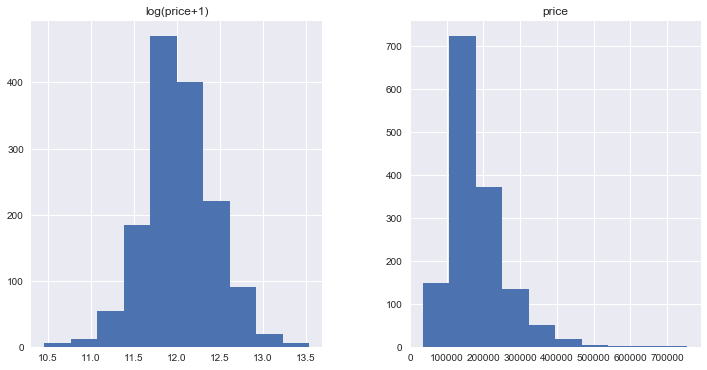

In [10]:
matplotlib.rcParams['figure.figsize'] = (12,6)
prices = pd.DataFrame({'price':train['SalePrice'],'log(price+1)':np.log1p(train['SalePrice'])})
prices.hist()

In [11]:
numeric = all_data.describe().T.index.copy()

In [12]:
numeric

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold'],
      dtype='object')

In [13]:
train['SalePrice'] = np.log1p(train['SalePrice'])

numeric_feats = all_data.dtypes[all_data.dtypes!='object'].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index



In [14]:
all_data[numeric] = np.log1p(all_data[numeric])

In [15]:
all_data[skewed_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,3.820503,0.692436,3.044522,3.044522,3.931826,4.262680,5.252273
LotFrontage,2433.0,4.196175,0.350864,3.091042,4.094345,4.234107,4.394449,5.749393
LotArea,2919.0,9.094915,0.509882,7.170888,8.919854,9.154193,9.356257,12.279537
MasVnrArea,2896.0,2.095752,2.624720,0.000000,0.000000,0.000000,5.105945,7.378384
BsmtFinSF1,2918.0,4.226403,2.981325,0.000000,0.000000,5.912150,6.598509,8.638525
BsmtFinSF2,2918.0,0.681207,1.878810,0.000000,0.000000,0.000000,0.000000,7.331060
BsmtUnfSF,2918.0,5.627146,1.866773,0.000000,5.398163,6.148468,6.692703,7.756623
TotalBsmtSF,2918.0,6.733140,1.176076,0.000000,6.677083,6.898210,7.172425,8.717846
1stFlrSF,2919.0,7.004186,0.322650,5.814131,6.776507,6.987490,7.235979,8.536211
2ndFlrSF,2919.0,2.829584,3.277023,0.000000,0.000000,0.000000,6.558198,7.633370


In [16]:
# all_data[skewed_feats].isnull().sum()

In [17]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,1.098612,7.605392,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,1.791759,7.604894,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2.302585,7.605392,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,1.098612,7.604396,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,2.564949,7.605392,WD,Normal


In [18]:
all_data = pd.get_dummies(all_data)

In [19]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.196175,9.094915,1.937899,1.867152,7.586843,7.593452,2.095752,4.226403,0.681207,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.692436,0.350864,0.509882,0.207290,0.173171,0.015433,0.010550,2.624720,2.981325,1.878810,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,3.044522,3.091042,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.094345,8.919854,1.791759,1.791759,7.577890,7.583756,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.234107,9.154193,1.945910,1.791759,7.587817,7.597898,0.000000,5.912150,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.394449,9.356257,2.079442,1.945910,7.601902,7.603399,5.105945,6.598509,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,8.638525,7.331060,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
all_data.shape

(2919, 288)

In [22]:
all_data.isnull().sum()

MSSubClass                 0
LotFrontage              486
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                23
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               2
BsmtHalfBath               2
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt              159
GarageCars                 1
GarageArea                 1
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
                        ... 
GarageCond_TA              0
PavedDrive_N               0
PavedDrive_P               0
PavedDrive_Y  

In [23]:
all_data = all_data.fillna(all_data.median())

In [24]:
from sklearn.preprocessing import StandardScaler

def standardize(data):
    data_columns = data.columns
    data_index = data.index
    norm = StandardScaler()
    norm.fit(data)
    
    data_standard = pd.DataFrame(norm.transform(data), index=data_index)
    data_standard.columns = data_columns
#     data_standard.index = data_index
    return(data_standard,norm)

In [25]:
all_data[numeric],norm = standardize(all_data[numeric])

In [26]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.419418,-0.040039,-0.103719,0.682938,-0.435439,1.040634,0.895720,1.222670,0.783116,-0.362565,...,0,0,0,1,0,0,0,0,1,0
1,-1.120845,0.598801,0.146544,0.038652,1.906370,0.161526,-0.390199,-0.793461,0.892327,-0.362565,...,0,0,0,1,0,0,0,0,1,0
2,0.419418,0.098625,0.457629,0.682938,-0.435439,0.975922,0.848403,1.150372,0.658046,-0.362565,...,0,0,0,1,0,0,0,0,1,0
3,0.638691,-0.285790,0.136301,0.682938,-0.435439,-1.869638,-0.678343,-0.793461,0.386824,-0.362565,...,0,0,0,1,1,0,0,0,0,0
4,0.419418,0.749164,0.922662,1.251239,-0.435439,0.943542,0.753698,1.443082,0.757995,-0.362565,...,0,0,0,1,0,0,0,0,1,0


In [27]:
all_data.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
                        ..
GarageCond_TA            0
PavedDrive_N             0
PavedDrive_P             0
PavedDrive_Y             0
PoolQC_Ex                0
PoolQC_Fa                0
P

In [28]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,-4.106190e-16,1.054636e-15,-2.927933e-15,3.379353e-16,1.481324e-15,-6.344398e-15,8.417647e-14,-3.123001e-16,7.523197e-17,-3.181574e-16,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,-1.120845e+00,-3.467074e+00,-3.774121e+00,-6.005905e+00,-6.780599e+00,-3.340684e+00,-1.645198e+00,-7.934612e-01,-1.418228e+00,-3.625654e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.120845e+00,-2.857898e-01,-3.433953e-01,-7.051222e-01,-4.354392e-01,-5.802864e-01,-9.191339e-01,-7.934612e-01,-1.418228e+00,-3.625654e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.607969e-01,9.862474e-02,1.162777e-01,3.865185e-02,-4.354392e-01,6.310729e-02,4.214851e-01,-7.934612e-01,5.654044e-01,-3.625654e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.386906e-01,5.208114e-01,5.126409e-01,6.829382e-01,4.548755e-01,9.759224e-01,9.430131e-01,1.153866e+00,7.956902e-01,-3.625654e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.068083e+00,4.825442e+00,6.246870e+00,2.219471e+00,2.514892e+00,1.266618e+00,1.226278e+00,2.022214e+00,1.480152e+00,3.540654e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [32]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [33]:
model_ridge = Ridge()

In [34]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

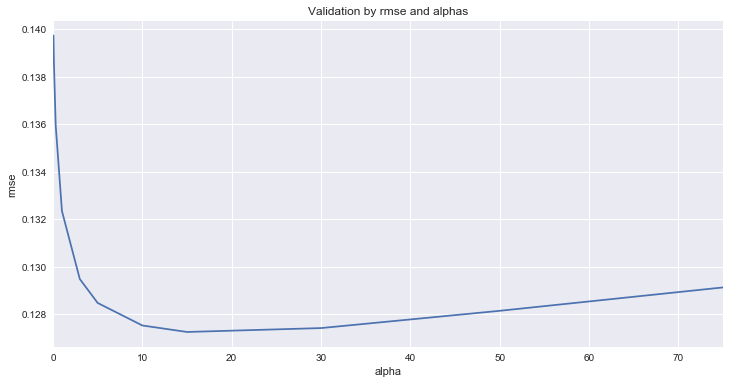

In [35]:
cv_ridge = pd.Series(cv_ridge,index=alphas)
cv_ridge.plot(title='Validation by rmse and alphas')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [36]:
cv_ridge

0.05     0.139743
0.10     0.138632
0.30     0.135966
1.00     0.132341
3.00     0.129471
5.00     0.128463
10.00    0.127513
15.00    0.127239
30.00    0.127404
50.00    0.128132
75.00    0.129118
dtype: float64

In [37]:
cv_ridge.min()

0.12723910383548093

In [41]:
alphas = np.arange(18.5,19,0.01)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

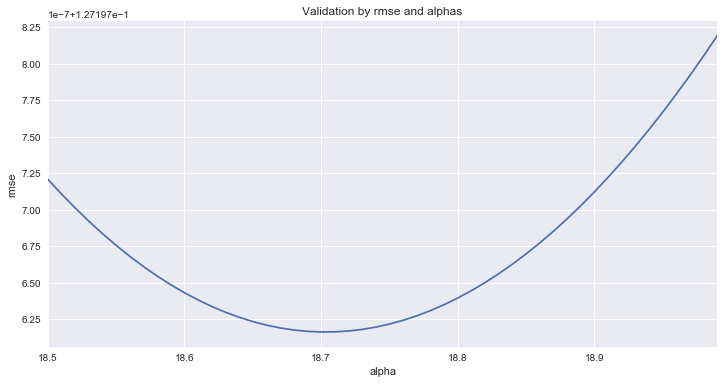

In [42]:
cv_ridge = pd.Series(cv_ridge,index=alphas)
cv_ridge.plot(title='Validation by rmse and alphas')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [43]:
cv_ridge.min()

0.12719761626178244

In [45]:
ridge = Ridge(alpha=18.7)
ridge.fit(X_train,y)
ridge.score(X_train,y)

0.92608213939188722

In [ ]:
# X_test = test[x_columns]
# X_test = X_test.as_matrix()


preds = ridge.predict(X_test)
# preds2 = grid_randFor2.predict(X_test)
y_pred = np.expm1(preds)
# y_pred2 = np.expm1(preds2)

krr = pd.DataFrame()
krr['Id'] = test['Id']
krr['SalePrice'] = y_pred
# krr['bandgap_energy_ev'] = y_pred2
krr.to_csv("Harga Rumah Ridge allnumeric.csv", index=False)

In [ ]:
np.expm1(np.expm1(preds))

In [46]:
from sklearn.kernel_ridge import KernelRidge

In [51]:
# alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
alphas = np.arange(0,0.1,0.0001)
cv_ridge = [rmse_cv(KernelRidge(kernel = 'polynomial',alpha = alpha)).mean() 
            for alpha in alphas]

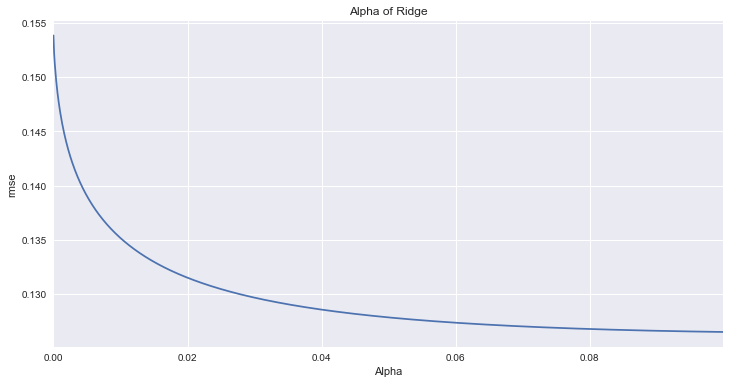

In [52]:
cv_ridge = pd.Series(cv_ridge,index=alphas)
cv_ridge.plot(title = 'Alpha of Ridge')
plt.xlabel('Alpha')
plt.ylabel('rmse')

In [54]:
cv_ridge.min()

0.12652282619719907

In [50]:
cv_ridge

0.05     0.127865
0.10     0.126522
0.30     0.127831
1.00     0.136383
3.00     0.155687
5.00     0.171147
10.00    0.204374
15.00    0.235649
30.00    0.331641
50.00    0.466425
75.00    0.638523
dtype: float64

In [55]:
cari_min = pd.DataFrame({'rmse':cv_ridge,'alpha':cv_ridge.index})

In [56]:
cari_min.sort_values(by='rmse',ascending=True).head()

,alpha,rmse
0.0999,0.0999,0.126523
0.0998,0.0998,0.126524
0.0997,0.0997,0.126525
0.0996,0.0996,0.126525
0.0995,0.0995,0.126526


In [57]:
cari_min['rmse'].min()

0.12652282619719907

In [58]:
# cari_min['rmse'].min()

ridge = KernelRidge(kernel='polynomial',alpha=0.01)
ridge.fit(X_train,y)
ridge.score(X_train,y)
# 398753000

0.99346755451734503

In [61]:
# X_test = test[x_columns]
# X_test = X_test.as_matrix()


preds = ridge.predict(X_test)
# preds2 = grid_randFor2.predict(X_test)
y_pred = np.expm1(preds)
# y_pred = np.expm1(y_pred)

krr = pd.DataFrame()
krr['Id'] = test['Id']
krr['SalePrice'] = y_pred
# krr['bandgap_energy_ev'] = y_pred2
krr.to_csv("Harga Rumah Ridge normalize2 polynomial.csv", index=False)

In [ ]:
np.expm1(preds)

In [62]:
y_pred

array([ 128638.35951168,  149839.14208175,  196395.07155221, ...,
        178610.49579587,  112481.46869992,  223545.78824077])

In [63]:
model_lasso = LassoCV(random_state=123)

In [64]:
alp = [1,0.1,0.001,0.0005]
cv_lasso = [rmse_cv(LassoCV(alphas = alp)).mean() 
            for alphas in alp]

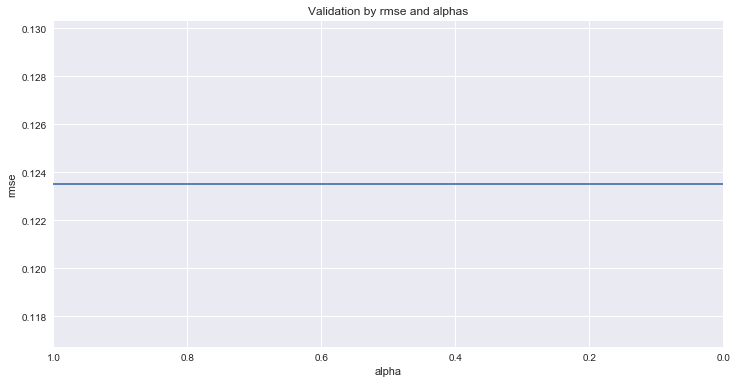

In [65]:
cv_lasso = pd.Series(cv_lasso,index=alp)
cv_lasso.plot(title='Validation by rmse and alphas')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [66]:
rmse_cv(model_lasso).mean()

0.12345067275652759

In [67]:
model_lasso = LassoCV(alphas = alp).fit(X_train,y)

In [68]:
coef = pd.Series(model_lasso.coef_,index=X_train.columns)

In [69]:
print('Lasso Picked '+str(sum(coef!=0)) + ' variables and eliminated the other ' + str(sum(coef == 0)) + ' variables')

Lasso Picked 115 variables and eliminated the other 173 variables


In [70]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

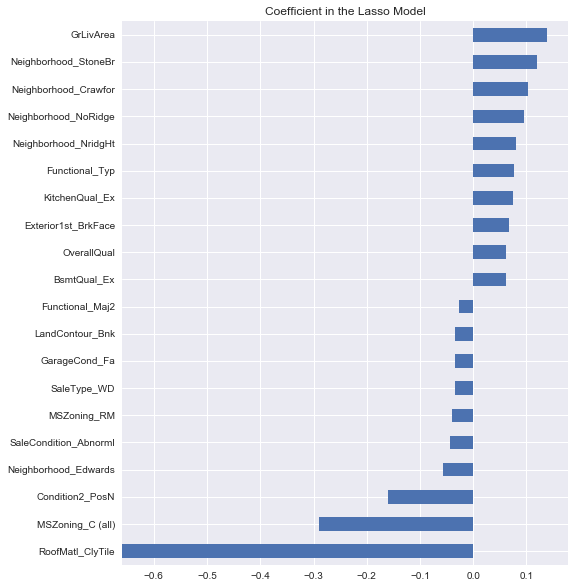

In [71]:
matplotlib.rcParams['figure.figsize'] = (8,10)
imp_coef.plot(kind='barh')
plt.title('Coefficient in the Lasso Model')

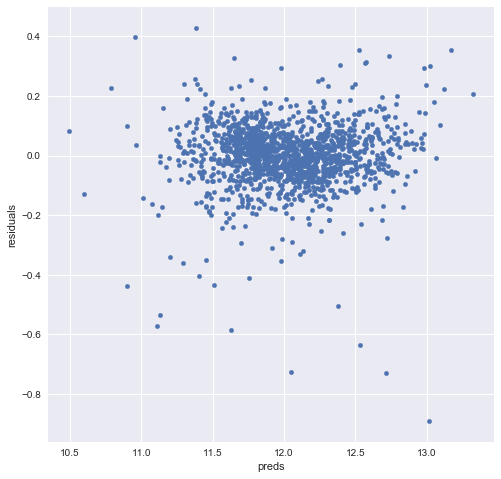

In [72]:
matplotlib.rcParams['figure.figsize'] = (8,8)

preds = pd.DataFrame({'preds':model_lasso.predict(X_train),'actual':y})
preds['residuals'] = preds['actual'] - preds['preds']
preds.plot(x='preds',y='residuals',kind='scatter')

In [73]:
cv_lasso.min()

0.12353058280712292

In [74]:
model_lasso

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [75]:
model_lasso.score(X_train,y)

0.92966899976745987

In [99]:
# X_test = test[x_columns]
# X_test = X_test.as_matrix()


preds = model_lasso.predict(X_test)
# preds2 = grid_randFor2.predict(X_test)
y_pred = np.expm1(preds)
# y_pred2 = np.expm1(preds2)

krr = pd.DataFrame()
krr['Id'] = test['Id']
krr['SalePrice'] = y_pred
# krr['bandgap_energy_ev'] = y_pred2
krr.to_csv("Harga Rumah Lasso norm1 Normalize numeric.csv", index=False)

In [77]:
print(preds)
print(y_pred)

[ 11.66637861  11.93362729  12.10680585 ...,  12.04692526  11.67064325
  12.32051196]
[ 116584.3155658   152302.00839079  181099.21821724 ...,  170573.12968679
  117082.57160108  224247.9187249 ]


In [78]:
np.expm1(0.32573843)

0.38505303316489004

In [79]:
model_lasso.score(X_train,y)

0.92966899976745987

In [80]:
y_pred

array([ 116584.3155658 ,  152302.00839079,  181099.21821724, ...,
        170573.12968679,  117082.57160108,  224247.9187249 ])

In [ ]:
train.describe()

In [ ]:
all_data.describe()

In [92]:
sunting = train['PoolQC']
cobalagi = sunting.sort_values().reset_index()

In [98]:
type(cobalagi['PoolQC'][0])

str

In [100]:
model_lasso = LassoLarsCV().fit(X_train,y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 92 iterations, i.e. alpha=1.499e-04, with an active set of 90 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 135 iterations, i.e. alpha=7.264e-05, with an active set of 129 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 167 iterations, i.e. alpha=4.516e-05, with an active set of 161 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site

In [101]:
cv_lasso.min()

0.12353058280712292

In [102]:
model_lasso

LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute='auto', verbose=False)